# 5. Interior Point
For this training course we'll be using the optimization routines in SciPy.

In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

We also need to define a callback function so that we can plot the optimization steps.

In [2]:
def callback(x):
    global xprev
    plt.plot([xprev[0],x[0]],[xprev[1],x[1]],'b.-')
    xprev = x

## 5.1 Logarithmic Barrier

Recall that the logarithmic barrier function, for a single inequality constraint $c$, is given by

$
\begin{align}
\Phi_{\mu}(x) = f(x) - \mu \log c(x)
\end{align}
$

where $\mu >0$ is a barrier parameter. The gradient for the barrier function is

$
\begin{align}
\nabla \Phi_{\mu}(x) = \nabla f(x) - \mu\frac{1}{c(x)}\nabla c(x)
\end{align}
$

and the Hessian is given by

$
\begin{align}
\nabla^2 \Phi_{\mu}(x) = \nabla^2 f(x) - \mu\frac{1}{c(x)}\nabla^2 c(x)  +\mu\frac{1}{c(x)^2}\nabla c(x)\nabla c(x)^T
\end{align}
$

#### Coding Task:

For different fixed values of $\mu$, apply your favourite SciPy optimization routine to minimize $\Phi_{\mu}(x)$ for the following objectives:

1. $f(x) = \frac{1}{2}(ax_1^2 + x_2^2) \qquad\qquad\qquad$ with $\; c(x) = x_1 + x_2^2 - 1$ 

2. $f(x) = (a - x_1)^2 + b(x_2 - x_1^2)^2 \qquad$ with $\; c(x) = x_1 + x_2^2 - 1$ 

starting at $(x_1,x_2) = (1,1)$ for suitable choices of parameters $a,b$.

<ipython-input-3-918f0ce1df3f>:19: RuntimeWarning: invalid value encountered in log
  fun = lambda x: obj(x) - mu*np.log(con(x))
<ipython-input-3-918f0ce1df3f>:19: RuntimeWarning: invalid value encountered in log
  fun = lambda x: obj(x) - mu*np.log(con(x))
<ipython-input-3-918f0ce1df3f>:19: RuntimeWarning: invalid value encountered in log
  fun = lambda x: obj(x) - mu*np.log(con(x))
<ipython-input-3-918f0ce1df3f>:19: RuntimeWarning: invalid value encountered in log
  fun = lambda x: obj(x) - mu*np.log(con(x))


     fun: nan
     jac: array([0.05391532, 0.05420606])
 message: 'NaN result encountered.'
    nfev: 14
    nhev: 0
     nit: 2
    njev: 16
  status: 3
 success: False
       x: array([-0.00957127, -0.00019477])


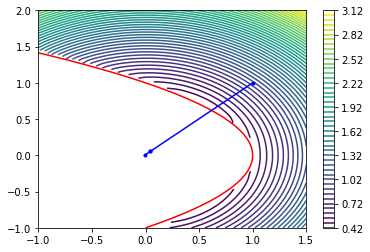

In [3]:
# Parameters
a = 1
mu = 0.01

# Initial guess
x0 = np.array([1,1])

# Objective function, gradient and Hessian
obj = lambda x: 0.5*(a*x[0]**2+x[1]**2)  
gobj = lambda x: np.array([a*x[0],x[1]])  
hobj = lambda x: np.array([[a,0],[0,1]])

# Constraint function, gradient and Hessian
con = lambda x: x[0]+x[1]**2-1
gcon = lambda x: np.array([1,2*x[1]])
hcon = lambda x: np.array([[0,0],[0,2]])

# Barrier function, gradient and Hessian
fun = lambda x: obj(x) - mu*np.log(con(x))
jac = lambda x: gobj(x) - (mu/con(x))*gcon(x)
hess = lambda x: hobj(x) - (mu/con(x))*hcon(x) + (mu/con(x)**2)*gcon(x).dot(gcon(x).T)

# Plot function contours
plt.figure()
X = np.linspace(-1,1.5)
Y = np.linspace(-a,a+1)
Z = np.meshgrid(X,Y)
plt.contour(X,Y,fun(Z),50)
plt.colorbar()

# Plot constraint
plt.contour(X,Y,con(Z),[0],colors='r')

# Call SciPy's Newton-CG
xprev = x0 # for plotting
res = opt.minimize(fun, x0, method='Newton-CG', jac=jac, tol=1e-1, callback=callback)

# Print results and show plot
print(res)
plt.show()

<ipython-input-4-27c64722538b>:20: RuntimeWarning: invalid value encountered in log
  fun = lambda x: obj(x) - mu*np.log(con(x))


     fun: -0.0005611050708775293
     jac: array([-0.01, -0.02])
 message: 'Optimization terminated successfully.'
    nfev: 2
    nhev: 0
     nit: 1
    njev: 5
  status: 0
 success: True
       x: array([1.0230389 , 1.04617092])


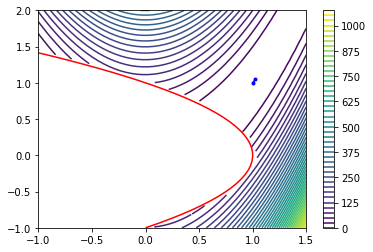

In [4]:
# Parameters
a = 1
b = 100
mu = 0.01

# Initial guess
x0 = np.array([1,1])

# Objective function, gradient and Hessian
obj = lambda x: (a-x[0])**2 + b*(x[1]-x[0]**2)**2
gobj = lambda x: np.array([-2*(a-x[0])-2*x[0]*2*b*(x[1]-x[0]**2),2*b*(x[1]-x[0]**2)])
hobj = lambda x: np.array([[2-4*b*x[1]+12*b*x[0]**2,-4*b*x[0]],[-4*b*x[0],2*b]])

# Constraint function, gradient and Hessian
con = lambda x: x[0]+x[1]**2-1
gcon = lambda x: np.array([1,2*x[1]])
hcon = lambda x: np.array([[0,0],[0,2]])

# Barrier function, gradient and Hessian
fun = lambda x: obj(x) - mu*np.log(con(x))
jac = lambda x: gobj(x) - (mu/con(x))*gcon(x)
hess = lambda x: hobj(x) - (mu/con(x))*hcon(x) + (mu/con(x)**2)*gcon(x).dot(gcon(x).T)

# Plot function contours
plt.figure()
X = np.linspace(-1,1.5)
Y = np.linspace(-a,a+1)
Z = np.meshgrid(X,Y)
plt.contour(X,Y,fun(Z),50)
plt.colorbar()

# Plot constraint
plt.contour(X,Y,con(Z),[0],colors='r')

# Call SciPy's Newton-CG
xprev = x0 # for plotting
res = opt.minimize(fun, x0, method='Newton-CG', jac=jac, tol=1e-1, callback=callback)

# Print results and show plot
print(res)
plt.show()

## 5.2 Central Paths

Recall that the perturbed first-order optimality conditions for a single inequality constrained problem are given by

$
\begin{align}
\nabla f(x) - \nabla c(x) y &= 0 \\
c(x)y &= \mu
\end{align}
$

for $c(x) > 0$ and $y > 0$.

Interior point methods track solutions $(x^*,y^*)$ to this nonlinear system of equations whilst maintaining feasibility (i.e. $c(x^*), y^* > 0$) as $\mu$ shrinks to zero. These correspond to solutions in the interior of the feasible domain (hence the name) which follow a "central path" through the feasible domain.

#### Coding Task:

For progressively smaller values of $\mu$, use Scipy's root finding to find and plot solutions to the above nonlinear system for the following objectives:

1. $f(x) = \frac{1}{2}(ax_1^2 + x_2^2) \qquad\qquad\qquad$ with $\; c(x) = x_1 + x_2^2 - 1$ 

2. $f(x) = (a - x_1)^2 + b(x_2 - x_1^2)^2 \qquad$ with $\; c(x) = x_1 + x_2^2 - 1$ 

starting at $(x_1,x_2,y) = (1,1,1)$ for suitable choices of parameters $a,b$.


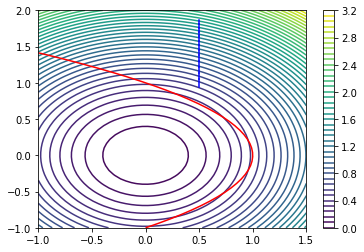

In [5]:
# Parameters
a = 1
mus = np.arange(1.5,0.1,-0.1)

# Initial guess
x0 = np.array([1,1])
y0 = 1

# Objective function, gradient and Hessian
obj = lambda x: 0.5*(a*x[0]**2+x[1]**2)  
gobj = lambda x: np.array([a*x[0],x[1]])  
hobj = lambda x: np.array([[a,0],[0,1]])

# Constraint function, gradient and Hessian
con = lambda x: x[0]+x[1]**2-1
gcon = lambda x: np.array([1,2*x[1]])
hcon = lambda x: np.array([[0,0],[0,2]])

# Nonlinear system as a vector function and its Jacobian
sys = lambda x,y,mu: np.append(gobj(x) - gcon(x)*y, con(x)*y-mu)
Jsys = lambda x,y,mu: np.vstack(( np.vstack((hobj(x) - hcon(x)*y,-gcon(x))).T, np.append(gcon(x)*y,con(x)) ))

# Plot function contours
plt.figure()
X = np.linspace(-1,1.5)
Y = np.linspace(-a,a+1)
Z = np.meshgrid(X,Y)
plt.contour(X,Y,obj(Z),50)
plt.colorbar()

# Plot constraint
plt.contour(X,Y,con(Z),[0],colors='r')

# Call SciPy's root for each value of mu
v0 = np.hstack((x0,y0)) # starting points 
xprev = None # for plotting
for mu in mus:
    
    # nonlinear system and its Jacobian
    fun = lambda v: sys(v[:-1],v[-1],mu)
    jac = lambda v: Jsys(v[:-1],v[-1],mu)
    
    # find root of nonlinear system 
    res = opt.root(fun, v0, jac=jac, tol=1e-10)
    
    # plot root
    if xprev is not None:
        plt.plot([xprev[0],res.x[0]],[xprev[1],res.x[1]],'b-')
    xprev = res.x # for plotting
    
# Show plot
plt.show()

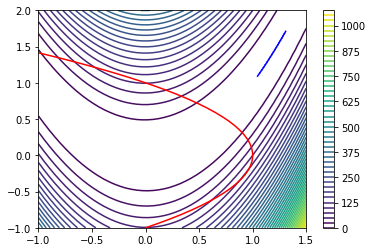

In [6]:
# Parameters
a = 1
b = 100
mus = np.arange(0.2,0.01,-0.01)

# Initial guess
x0 = np.array([1,1])
y0 = 1

# Objective function, gradient and Hessian
obj = lambda x: (a-x[0])**2 + b*(x[1]-x[0]**2)**2
gobj = lambda x: np.array([-2*(a-x[0])-2*x[0]*2*b*(x[1]-x[0]**2),2*b*(x[1]-x[0]**2)])
hobj = lambda x: np.array([[2-4*b*x[1]+12*b*x[0]**2,-4*b*x[0]],[-4*b*x[0],2*b]])

# Constraint function, gradient and Hessian
con = lambda x: x[0]+x[1]**2-1
gcon = lambda x: np.array([1,2*x[1]])
hcon = lambda x: np.array([[0,0],[0,2]])

# Nonlinear system as a vector function and its Jacobian
sys = lambda x,y,mu: np.append(gobj(x) - gcon(x)*y, con(x)*y-mu)
Jsys = lambda x,y,mu: np.vstack(( np.vstack((hobj(x) - hcon(x)*y,-gcon(x))).T, np.append(gcon(x)*y,con(x)) ))

# Plot function contours
plt.figure()
X = np.linspace(-1,1.5)
Y = np.linspace(-a,a+1)
Z = np.meshgrid(X,Y)
plt.contour(X,Y,obj(Z),50)
plt.colorbar()

# Plot constraint
plt.contour(X,Y,con(Z),[0],colors='r')

# Call SciPy's root for each value of mu
v0 = np.hstack((x0,y0)) # starting points 
xprev = None # for plotting
for mu in mus:
    
    # nonlinear system and its Jacobian
    fun = lambda v: sys(v[:-1],v[-1],mu)
    jac = lambda v: Jsys(v[:-1],v[-1],mu)
    
    # find root of nonlinear system 
    res = opt.root(fun, v0, jac=jac, tol=1e-10)
    
    # plot root
    if xprev is not None:
        plt.plot([xprev[0],res.x[0]],[xprev[1],res.x[1]],'b-')
    xprev = res.x # for plotting
    
# Show plot
plt.show()